In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# print(X[0:1])
some_digit = X[0:1]
some_digit_image = some_digit.reshape(28, 28)
# print(some_digit_image)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

print('Solution :' + y[0]) # string

In [4]:
import numpy as np
y = y.astype(np.uint8) # cast y to integers
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn_clf.predict(some_digit)

array([5], dtype=uint8)

In [8]:
print("accuracy KNN (test): {:2f}".format(knn_clf.score(X_test, y_test)))

accuracy KNN (test): 0.962700


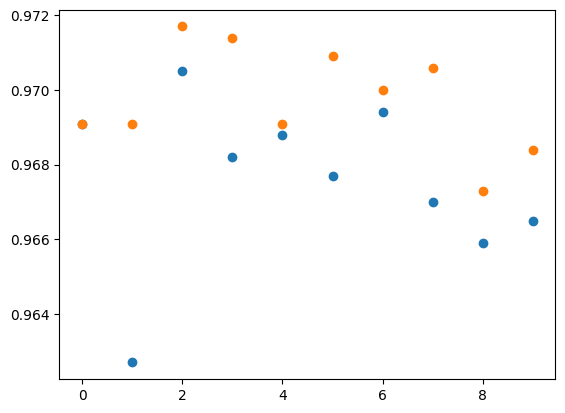

In [13]:
import matplotlib.pyplot as plt
import numpy as np

X_result = []
y_result_1 = []
y_result = []
for i in range(10):
  knn_clf = KNeighborsClassifier(n_neighbors=(i+1))
  knn_clf_1 = KNeighborsClassifier(n_neighbors=(i+1), weights='distance')
  knn_clf.fit(X_train, y_train)
  knn_clf_1.fit(X_train, y_train)
  X_result.append(i)
  y_result.append(knn_clf.score(X_test, y_test))
  y_result_1.append(knn_clf_1.score(X_test, y_test))

plt.scatter(np.array(X_result), np.array(y_result))
plt.scatter(np.array(X_result), np.array(y_result_1))
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9621, 0.962 , 0.9645])

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5882,    6,    6,    1,    1,    5,   16,    2,    2,    2],
       [   1, 6699,   16,    1,    3,    1,    3,   12,    1,    5],
       [  59,   94, 5620,   23,    7,    9,   12,  104,   19,   11],
       [   8,   24,   41, 5880,    3,   60,    4,   43,   37,   31],
       [   7,   72,    1,    0, 5610,    0,   16,   11,    2,  123],
       [  20,   23,    4,   77,    8, 5182,   57,    5,   11,   34],
       [  28,   18,    2,    0,    5,   29, 5834,    0,    2,    0],
       [   4,   87,   15,    2,   19,    2,    0, 6066,    2,   68],
       [  23,  104,   20,   98,   39,  118,   31,   20, 5325,   73],
       [  18,   21,    4,   52,   53,   12,    3,   98,   14, 5674]])

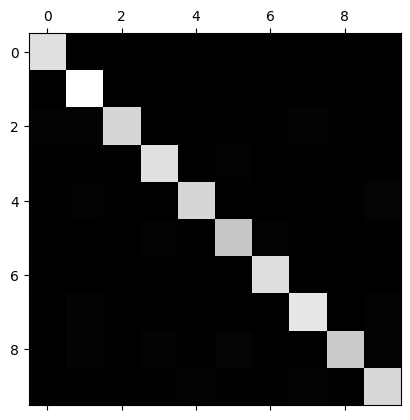

In [18]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()